In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
import os
import random
from PIL import Image
import shutil
import cv2

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

In [2]:
os.getcwd()

'/Users/anarpereira/Docs_tcc/TCC'

In [3]:
diretorio_base= '/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas'

In [4]:
files = []
folders = []

df = pd.DataFrame(columns=['qty_files', 'folder', 'file_paths'])  # Cria um DataFrame vazio com as colunas desejadas

for pasta in os.listdir(diretorio_base):
    if 'PRE_PROCESSING' in pasta and '.' not in pasta:
        folders.append(pasta)
        caminho_pasta = os.path.join(diretorio_base, pasta)
        if os.path.isdir(caminho_pasta):
            # Obtém os arquivos da pasta
            arquivos = os.listdir(caminho_pasta)
            
            files_path = [os.path.join(pasta, arquivo) for arquivo in arquivos if '.ipy' not in arquivo]
    
            # Cria um DataFrame temporário com as informações da iteração atual
            temp_df = pd.DataFrame({'qty_files': len(files_path), 'folder': pasta, 'file_paths': [files_path]}, index=[0])
            
            if (len(files_path)!=0):
                # Concatena o DataFrame temporário com o DataFrame principal
                df = pd.concat([df, temp_df], ignore_index=True)
                files.extend(files_path)

In [5]:
df.shape

(5, 3)

In [6]:
df = df.sort_values(by='qty_files', ascending=False)[:5]

In [7]:
df[['qty_files','folder']]

,qty_files,folder
0,358,Marasmiusamazonicus_PRE_PROCESSING
2,325,Phallusindusiatuscomplex_PRE_PROCESSING
1,265,Cookeinatricholoma_PRE_PROCESSING
4,198,Coprinellusdisseminatus_PRE_PROCESSING
3,194,Schizophyllumcommune_PRE_PROCESSING


In [8]:
folders = df['folder'].to_list()

In [9]:
dict_names = {"Marasmiusamazonicus_PRE_PROCESSING":'Marasmius Amazonicus',
"Phallusindusiatuscomplex_PRE_PROCESSING":'Phallus indusiatus',
"Schizophyllumcommune_PRE_PROCESSING":'Schizophyllum commune',
"Coprinellusdisseminatus_PRE_PROCESSING":'Coprinellus Disseminatus',
"Cookeinatricholoma_PRE_PROCESSING":'Cookeina tricholoma'}

In [10]:
dict_codes = {"Marasmiusamazonicus_PRE_PROCESSING":1,
"Phallusindusiatuscomplex_PRE_PROCESSING":2,
"Schizophyllumcommune_PRE_PROCESSING":3,
"Coprinellusdisseminatus_PRE_PROCESSING":4,
"Cookeinatricholoma_PRE_PROCESSING":5}

In [11]:
def get_data(folder_division):
    df = pd.DataFrame(columns=['species','file_path','folder','folder_division'])

    for files in os.listdir(folder_division):
        print(files)
        if '.' not in files and '.DS_Store' not in files:
            species = files.split('_')[0].lower()
            new_file_list = []
            
            for i in os.listdir(os.path.join(folder_division, files)):
                # print(i)
                if '.DS_Store' not in i:
                    new_file_list.append(i)
            qty_files = len(new_file_list)
            
            df_temp = pd.DataFrame(data={'species':[species]*qty_files,
                                         'file_path':new_file_list,
                                         'folder':[files]*qty_files,
                                         'folder_division':[folder_division]*qty_files},
                                   columns=['species','file_path','folder','folder_division'])

            df = pd.concat([df, df_temp])
    return df.reset_index()

df_train = get_data(diretorio_base)
df_train['full_path'] = df_train['folder_division'] + '/' + df_train['folder'] + '/' + df_train['file_path']

Marasmiusamazonicus_PRE_PROCESSING
Cookeinatricholoma_PRE_PROCESSING
Phallusindusiatuscomplex_PRE_PROCESSING
Schizophyllumcommune_PRE_PROCESSING
Coprinellusdisseminatus_PRE_PROCESSING


In [12]:
df_train.head()

,index,species,file_path,folder,folder_division,full_path
0,0,marasmiusamazonicus,processed_SSMarasmius_amazinicus_Voucher_135_PC264806_26_12_2016_Cacao_Trail_CJL_BR_345.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazinicus_Voucher_135_PC264806_26_12_2016_Cacao_Trail_CJL_BR_345.jpg
1,1,marasmiusamazonicus,processed_SSMarasmius_amazonicus_PC287027_28_12_2016_Caju_Trail_CJL_BR_198.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazonicus_PC287027_28_12_2016_Caju_Trail_CJL_BR_198.jpg
2,2,marasmiusamazonicus,processed_SSMarasmius_amazonicus_PC1032337_3_1_2017_Taboca_Trail_CJL_BR_336.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazonicus_PC1032337_3_1_2017_Taboca_Trail_CJL_BR_336.jpg
3,3,marasmiusamazonicus,processed_SSP1086381_8_1_2019_Torre_2_Trail_CJL_BR_5.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas/Marasmiusamazonicus_PRE_PROCESSING/processed_SSP1086381_8_1_2019_Torre_2_Trail_CJL_BR_5.jpg
4,4,marasmiusamazonicus,processed_SSMarasmius_amazinicus_Voucher_135_PC264844_26_12_2016_Cacao_Trail_CJL_BR_165.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazinicus_Voucher_135_PC264844_26_12_2016_Cacao_Trail_CJL_BR_165.jpg


In [13]:
df_train['species_code'] = df_train['folder'].apply(lambda x: dict_codes[x])

# Modeling

In [14]:
import os
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [17]:
# Definir parâmetros
input_shape = (224, 224, 3)
num_classes = 5 
k_folds = 5 
batch_size = 32
epochs = 150

In [18]:
# Função para criar o modelo
import tensorflow as tf
def create_model():
    base_model = ResNet50(include_top=False, input_shape=input_shape)
    
    for layer in base_model.layers:
        layer.trainable=False
        
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',
                                                                                                 tf.keras.metrics.Precision(),
                                                                                                 tf.keras.metrics.Recall()])
    
    return model

In [19]:
x = create_model()

2025-03-15 15:54:56.794973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
x.compile()
x.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 26,740,613
Trainable params: 3,152,901
Non-trainable params: 23,587,712
____________________________________

In [19]:
import tensorflow as tf
from timeit import default_timer as timer

class TimingCallback(tf.keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [22]:
# Convertendo para arrays NumPy
data = np.array(df_train['full_path'])
labels = np.array(df_train['species_code'])

df = pd.DataFrame({'paths':data, 'labels':labels}).astype(str)
df.to_csv('blurred_sharpen.csv')

In [33]:
accuracies = []
losses = []
val_accuracies = []
val_losses = []

from sklearn.model_selection import train_test_split

df = pd.DataFrame({'paths':data, 'labels':labels}).astype(str)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.20, shuffle=True)

# # Dividindo os dados em treino e validação
# train_data = data
# train_labels = labels
df_train = pd.DataFrame({'paths':X_train, 'labels':y_train}).astype(str)
df_val = pd.DataFrame({'paths':X_val, 'labels':y_val}).astype(str)

# # Dividindo os dados em treino e validação
# val_data = data[1073:]
# val_labels = labels[1073:]
# df_val = pd.DataFrame({'paths':val_data, 'labels':val_labels}).astype(str)

# Gerador de dados
datagen = ImageDataGenerator(rescale=1./255)

# Geradores de dados
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=diretorio_base,
    x_col='paths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=diretorio_base,
    x_col='paths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Criar o modelo
model = create_model()

# Callbacks
early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min')
mcp_save = ModelCheckpoint(f'best_model_com_blurred_sharp_150.h5', save_best_only=False, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

# Treinar o modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping, mcp_save, reduce_lr_loss]
)

with open('history_com_trat_com_blurred_sharp.pickle', 'wb') as handle:
    pickle.dump(history, handle)
    
# Armazenar os resultados
accuracies.append(history.history['accuracy'])
losses.append(history.history['loss'])
val_accuracies.append(history.history['val_accuracy'])
val_losses.append(history.history['val_loss'])

# Fazer previsões no conjunto de validação
val_preds = model.predict(val_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
val_true_classes = val_generator.classes


Found 1072 validated image filenames belonging to 5 classes.
Found 268 validated image filenames belonging to 5 classes.
Epoch 1/150
34/34 [==============================] - 172s 5s/step - loss: 1.8750 - accuracy: 0.2705 - precision_3: 0.1942 - recall_3: 0.0252 - val_loss: 1.5405 - val_accuracy: 0.2351 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - lr: 0.0010
Epoch 2/150
34/34 [==============================] - 192s 6s/step - loss: 1.4296 - accuracy: 0.4030 - precision_3: 0.9474 - recall_3: 0.0504 - val_loss: 1.3164 - val_accuracy: 0.4366 - val_precision_3: 1.0000 - val_recall_3: 0.0970 - lr: 0.0010
Epoch 3/150
34/34 [==============================] - 248s 7s/step - loss: 1.2062 - accuracy: 0.5252 - precision_3: 0.8485 - recall_3: 0.2090 - val_loss: 1.1268 - val_accuracy: 0.6455 - val_precision_3: 0.9672 - val_recall_3: 0.2201 - lr: 0.0010
Epoch 4/150
34/34 [==============================] - 225s 7s/step - loss: 1.1303 - accuracy: 0.5550 - precision_3: 0.8271 - recall_3: 0.

INFO:tensorflow:Assets written to: ram://938caf19-4c4b-4b81-b9fe-df87068858f0/assets


INFO:tensorflow:Assets written to: ram://938caf19-4c4b-4b81-b9fe-df87068858f0/assets


9/9 [==============================] - 19s 2s/step


In [37]:
np.mean(history.history['accuracy'])

0.8476397501972487

In [38]:
from sklearn.metrics import classification_report

In [39]:
# # Gerar e salvar o relatório de classificação
# report = classification_report(val_true_classes, val_preds_classes, target_names=val_generator.class_indices.keys(),output_dict=True)
# with open(f'classification_report_com_blurred_sharp.txt', 'w') as f:
#     f.write(report)

In [36]:
report = classification_report(val_true_classes, val_preds_classes, target_names=val_generator.class_indices.keys(),output_dict=True)

In [27]:
pd.DataFrame(report).to_csv('classification_report_com_blurred_sharp.csv')

In [40]:
pd.DataFrame(report)

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.819444,0.951613,0.823529,0.863636,0.964286,0.88806,0.884502,0.889638
recall,0.951613,0.951613,0.666667,0.883721,0.915254,0.88806,0.873774,0.888060
f1-score,0.880597,0.951613,0.736842,0.873563,0.939130,0.88806,0.876349,0.886255
support,62.000000,62.000000,42.000000,43.000000,59.000000,0.88806,268.000000,268.000000


### Resnet 50 V2

In [29]:
versao = 'com_blurred_sharp_150_noweigths'

In [30]:
# Função para criar o modelo
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2

def create_model_v2():
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights=None)
    
    for layer in base_model.layers:
        layer.trainable=False
        
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',
                                                                                                 tf.keras.metrics.Precision(),
                                                                                                 tf.keras.metrics.Recall()])
    
    return model

def create_model_resnet50():
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights=None)
    
    for layer in base_model.layers:
        layer.trainable=False
        
    model = Sequential([
        base_model,
        # GlobalAveragePooling2D(),
        # Dense(1024, activation='relu'),
        # Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',
                                                                                                 tf.keras.metrics.Precision(),
                                                                                                 tf.keras.metrics.Recall()])
    
    return model

In [31]:
accuracies = []
losses = []
val_accuracies = []
val_losses = []

from sklearn.model_selection import train_test_split

df = pd.DataFrame({'paths':data, 'labels':labels}).astype(str)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.20, shuffle=True)

# # Dividindo os dados em treino e validação
# train_data = data
# train_labels = labels
df_train = pd.DataFrame({'paths':X_train, 'labels':y_train}).astype(str)
df_val = pd.DataFrame({'paths':X_val, 'labels':y_val}).astype(str)

# # Dividindo os dados em treino e validação
# val_data = data[1073:]
# val_labels = labels[1073:]
# df_val = pd.DataFrame({'paths':val_data, 'labels':val_labels}).astype(str)

# Gerador de dados
datagen = ImageDataGenerator(rescale=1./255)

# Geradores de dados
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=diretorio_base,
    x_col='paths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=diretorio_base,
    x_col='paths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Criar o modelo
model = create_model_v2()

# Callbacks
early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min')
mcp_save = ModelCheckpoint(f'best_model_{versao}.h5', save_best_only=False, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

# Treinar o modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping, mcp_save, reduce_lr_loss]
)


# Armazenar os resultados
accuracies.append(history.history['accuracy'])
losses.append(history.history['loss'])
val_accuracies.append(history.history['val_accuracy'])
val_losses.append(history.history['val_loss'])

# Fazer previsões no conjunto de validação
val_preds = model.predict(val_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
val_true_classes = val_generator.classes


Found 1072 validated image filenames belonging to 5 classes.
Found 268 validated image filenames belonging to 5 classes.
Epoch 1/150
34/34 [==============================] - 245s 7s/step - loss: 1.5984 - accuracy: 0.2304 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 1.5754 - val_accuracy: 0.2575 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - lr: 0.0010
Epoch 2/150
34/34 [==============================] - 240s 7s/step - loss: 1.5926 - accuracy: 0.2537 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 1.5703 - val_accuracy: 0.3022 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - lr: 0.0010
Epoch 3/150
34/34 [==============================] - 232s 7s/step - loss: 1.5830 - accuracy: 0.2715 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 1.5515 - val_accuracy: 0.3134 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - lr: 0.0010
Epoch 4/150
34/34 [==============================] - 241s 7s/step - loss: 1.5725 - accuracy: 0.2


KeyboardInterrupt



In [ ]:
from sklearn.metrics import classification_report,roc_auc_score

# Gerar e salvar o relatório de classificação
report = classification_report(val_true_classes, val_preds_classes, target_names=val_generator.class_indices.keys())
with open(f'classification_report_fold_{versao}.txt', 'w') as f:
    f.write(report)

with open(f'history_{versao}.pickle', 'wb') as handle:
    pickle.dump(history, handle)

In [ ]:
!pip install netron

In [ ]:
import netron

netron.start('best_model_fold_1_150epochs.h5')


In [ ]:
!pip install pydot

In [ ]:
!pip install graphviz

In [ ]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=200,
    show_layer_activations=True)


### Validation

In [ ]:
from sklearn.metrics import classification_report

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=diretorio_base,
    x_col='paths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


# Fazer previsões no conjunto de validação
val_preds = model.predict(val_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
val_true_classes = val_generator.classes

# Gerar e salvar o relatório de classificação
report = classification_report(val_true_classes, val_preds_classes, target_names=val_generator.class_indices.keys(),output_dict=True)

df_results_semfundo = pd.DataFrame(report).transpose()

In [ ]:
df_results_semfundo.to_csv('report_val_sem_fundo.csv')

In [ ]:
results_df['Validation Accuracy'].max()

In [ ]:
results_df = pd.DataFrame({
    'Fold': range(0, len(accuracies[0])),
    'Train Accuracy': accuracies[0],
    'Train Loss': losses[0],
    'Validation Accuracy': val_accuracies[0],
    'Validation Loss': val_losses[0]
})


In [ ]:
results_df.to_csv(f'best_model_com_blurred_sharp_150.csv', index=False)

In [ ]:
results_df

In [ ]:
with open('model_com_trat.pickle', 'wb') as handle:
    pickle.dump(model, handle)

In [ ]:
import pandas as pd
for i in range(1,6):
    data = []

    with open(f"classification_report_fold_{i}_more_epochs.txt", "r") as f:
        lines = f.read().splitlines()  

    for line in lines[2:8]:  # Ignora as duas primeiras linhas de cabeçalho
        if len(line)!=0:
            data.append(line.split())
    
    # Crie um DataFrame
    report_df = pd.DataFrame()
    report_df = pd.DataFrame(data, columns=['class', 'precision', 'recall', 'f1-score', 'support'])
    
    # Ajuste os tipos de dados, se necessário
    report_df['precision'] = pd.to_numeric(report_df['precision'], errors='coerce')
    report_df['recall'] = pd.to_numeric(report_df['recall'], errors='coerce')
    report_df['f1-score'] = pd.to_numeric(report_df['f1-score'], errors='coerce')
    report_df['support'] = pd.to_numeric(report_df['support'], errors='coerce')
    # Exiba o DataFrame
    report_df.to_csv(f'classification_report_fold_{i}_more_epochs.csv')

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
# plt.style.use('fast')
results_df = pd.read_csv(f'cross_validation_results_with_time_more_epochs.csv')
plt.figure(figsize=(7,4))
plt.xlabel('K-folds')
plt.ylabel('Acurácia')
plt.plot(results_df['Fold'].astype(str), results_df['Train Accuracy'], 'r', label='Acurácia de treino')
plt.plot(results_df['Fold'].astype(str), results_df['Validation Accuracy'], 'b', label='Acurácia de validação')
plt.title('Acurácia de treino e validação - Resnet50 sem fundo, 150 epocas')
plt.legend()

plt.figure(figsize=(7,4))

# plt.plot(epochs, loss, 'r', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(7,4))

plt.plot(results_df['Fold'], results_df['Train Accuracy'], 'r', label='Training accuracy')
plt.plot(results_df['Fold'], results_df['Validation Accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,4))

plt.plot(results_df['Fold'], results_df['Train Loss'], 'r', label='Training Loss')
plt.plot(results_df['Fold'], results_df['Validation Loss'], 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import time
from sklearn.metrics import classification_report

accuracies = []
losses = []
val_accuracies = []
val_losses = []
times = []  # To store the duration of each fold

# Gerador de dados
datagen = ImageDataGenerator(rescale=1./255)

# KFold cross-validation
kf = KFold(n_splits=k_folds, random_state=42, shuffle=True)

fold_no = 1
for train_index, val_index in kf.split(data):
    print(f'Training fold {fold_no}/{k_folds}...')
    
    # Start timing
    start_time = time.time()

    # Dividindo os dados em treino e validação
    train_data = data[train_index]
    train_labels = labels[train_index]
    df_train = pd.DataFrame({'paths':train_data, 'labels':train_labels}).astype(str)
    
    val_data = data[val_index]
    val_labels = labels[val_index]
    df_val = pd.DataFrame({'paths':val_data, 'labels':val_labels}).astype(str)

    # Geradores de dados
    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train,
        directory=diretorio_base,
        x_col='paths',
        y_col='labels',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
    
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_val,
        directory=diretorio_base,
        x_col='paths',
        y_col='labels',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    
    # Criar o modelo
    model = create_model()
    
    # Callbacks
    early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min')
    mcp_save = ModelCheckpoint(f'best_model_fold_{fold_no}_more_epochs.h5', save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')
    
    # Treinar o modelo
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs,
        callbacks=[early_stopping, mcp_save, reduce_lr_loss]
    )
    
    # Armazenar os resultados
    accuracies.append(history.history['accuracy'][-1])
    losses.append(history.history['loss'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])
    val_losses.append(history.history['val_loss'][-1])
    
    # Fazer previsões no conjunto de validação
    val_preds = model.predict(val_generator)
    val_preds_classes = np.argmax(val_preds, axis=1)
    val_true_classes = val_generator.classes
    
    # Gerar e salvar o relatório de classificação
    report = classification_report(val_true_classes, val_preds_classes, target_names=val_generator.class_indices.keys())
    with open(f'classification_report_fold_{fold_no}_more_epochs.txt', 'w') as f:
        f.write(report)
    
    print(f'Classification Report for Fold {fold_no}:\n{report}')
    
    # End timing
    end_time = time.time()
    elapsed_time = end_time - start_time  # Calculate the duration of the fold in seconds
    times.append(elapsed_time)  # Store the duration
    
    print(f'Fold {fold_no} took {elapsed_time:.2f} seconds.')
    
    fold_no += 1
    
# Criar um DataFrame com os resultados
results_df = pd.DataFrame({
    'Fold': range(1, fold_no),
    'Train Accuracy': accuracies,
    'Train Loss': losses,
    'Validation Accuracy': val_accuracies,
    'Validation Loss': val_losses,
    'Time (seconds)': times  # Add the duration of each fold
})

# Salvar os resultados em um arquivo CSV
results_df.to_csv(f'cross_validation_results_with_time_more_epochs.csv', index=False)

In [ ]:
results_df['Train Accuracy'].mean(),results_df['Validation Accuracy'].mean()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['species_code'] = label_encoder.fit_transform(df_train['species'])
df_train['species_code'] = label_encoder.transform(df_train['species'])

In [ ]:
with open('label_enconder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle)

In [ ]:
df_test['species_code'] = label_encoder.transform(df_test['species'])

In [ ]:
df_train.head()

In [ ]:
df_train.groupby(['species','species_code']).count()['index'].reset_index().to_csv('species_code.csv')

### Baseline without Data Augmentation

In [ ]:
img_height = 224
img_width = 224
channels = 3
num_classes= df_train['species'].nunique()
X_train = img_train_normalized
y_train = df_train['species_code']
X_test = img_test_normalized
y_test = df_test['species_code']

In [ ]:
y_test = np.asarray(y_test).astype('int').reshape((-1,1))

In [ ]:
y_train = np.asarray(y_train).astype('int').reshape((-1,1))

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=False,
                  input_shape=(img_height, img_width, channels))

In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
base_model.compile()
base_model.summary()

In [ ]:
# with open('first_version.pickle', 'rb') as handle:
#     model = pickle.load(handle)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

# Definir o Early Stopping
early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min')
mcp_save = ModelCheckpoint('{epoch:02d}-{val_loss:.2f}.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

model = Sequential([base_model,
                    GlobalAveragePooling2D(),
                    Dense(1024, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, 
                    y_train,
                    epochs=50, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, mcp_save, reduce_lr_loss])

In [ ]:
model.fit()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,4))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,4))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.summary()

In [ ]:
with open('model_10_classes.pickle', 'wb') as handle:
    pickle.dump(model, handle)

In [ ]:
def get_predictions(model, examples, y_true):
    """Realiza predicoes para todos os exemplos e retorna um dataframe com os valores reais e os valores preditos"""
    predictions = model.predict(examples)

    predicted_labels = np.argmax(predictions, axis=1)


    df_predictions = pd.DataFrame({'true_label': y_true.reshape(-1),
                                   'predicted_label': predicted_labels})

    return df_predictions



In [ ]:
df_pred_test = get_predictions(model, X_test, y_test)

In [ ]:
df_pred_test_new = df_test.join(df_pred_test)

In [ ]:
df_pred_train = get_predictions(model, X_train, y_train)

In [ ]:
df_pred_train_new = df_train.join(df_pred_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('ACcuracy', accuracy_score(df_pred_train_new['true_label'], df_pred_train_new['predicted_label']))
print('ACcuracy', accuracy_score(df_pred_test_new['true_label'], df_pred_test_new['predicted_label']))

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score

print(classification_report(df_pred_test_new['true_label'], df_pred_test_new['predicted_label']))

In [ ]:
dict_classification_report = classification_report(df_pred_test_new['true_label'], df_pred_test_new['predicted_label'], output_dict=True)

In [ ]:
df_class_report = pd.DataFrame(dict_classification_report).transpose()

In [ ]:
df_class_report = df_class_report.reset_index().rename(columns={'index':'species_code'})

In [ ]:
df_class_report_sin_acc = df_class_report[:-3]

In [ ]:
df_class_report_sin_acc['species_code'] = df_class_report_sin_acc['species_code'].astype(int)

In [ ]:
df_class_report_sin_acc.columns

In [ ]:
df_class_report_sin_acc['precision'].describe()

In [ ]:
df_class_report_sin_acc['f1-score'].describe()

In [ ]:
df_class_report_sin_acc['recall'].describe()

In [ ]:
df_class_report_sin_acc.merge(df_test[['species','species_code']].drop_duplicates(), on='species_code').to_excel('metrics_test.xlsx')

In [ ]:
from sklearn.metrics import recall_score,f1_score,roc_auc_score,precision_score


In [ ]:
precision_score(df_pred_test_new['true_label'], df_pred_test_new['predicted_label'], average = 'macro')

In [ ]:
macro_averaged_recall = recall_score(df_pred_test_new['true_label'], 
                                             df_pred_test_new['predicted_label'], 
                                             average = 'macro')

print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")


In [ ]:
macro_averaged_f1 = f1_score(df_pred_test_new['true_label'], df_pred_test_new['predicted_label'], average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")


In [ ]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [ ]:
dict_roc = roc_auc_score_multiclass(df_pred_test_new['true_label'], df_pred_test_new['predicted_label'])

In [ ]:
np.mean([i for i in dict_roc.values()])

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(df_pred_test_new['true_label'], df_pred_test_new['predicted_label'])

In [ ]:
count=0

In [ ]:
for i, j, full_path in zip(df_pred_test_new['species_code'], df_pred_test_new['predicted_label'], df_pred_test_new['full_path']):
    
    path_specie_true = full_path
    path_specie_predicted = df_pred_test_new.loc[df_pred_test_new['species_code']==j, 'full_path'].sample(n=1).values[0]
    
    specie_true = df_pred_test_new.loc[df_pred_test_new['species_code']==i, 'species'].iloc[0]
    specie_predicted = df_pred_test_new.loc[df_pred_test_new['species_code']==j, 'species'].iloc[0]
    
    if i != j:
        count+=1
        img_true = Image.open(path_specie_true)
        img_predicted = Image.open(path_specie_predicted)

        # Exibir as imagens usando matplotlib
        fig, axs = plt.subplots(1, 2, figsize=(10,10))
        axs[0].imshow(img_true, cmap='gray')
        axs[0].set_title('Classe original: {0} - {1}'.format(i,specie_true))
        axs[0].axis('off')  # Oculta os eixos para melhorar a visualização

        axs[1].imshow(img_predicted, cmap='gray')
        axs[1].set_title('Classe predita: {0} - {1}'.format(j, specie_predicted))
        axs[1].axis('off')  # Oculta os eixos para melhorar a visualização

        plt.show()

In [ ]:
# train_folder = os.path.join(diretorio_base, 'train')
# test_folder = os.path.join(diretorio_base, 'test')

# for files_species in df['file_paths']:
#     random.seed(42)
#     random.shuffle(files_species)
    
#     # determine the number of images for each set
#     train_size = int(len(files_species) * 0.70)
#     test_size = int(len(files_species) * 0.30)
    
#     # Create destination folders if they don't exist
#     for folder_path in [train_folder, test_folder]:
#         if not os.path.exists(folder_path):
#             os.makedirs(folder_path)
            
#     # Copy image files to destination folders
#     for i, f in enumerate(files_species):
#         if i < train_size:
#             dest_folder = train_folder
#         else:
#             dest_folder = test_folder
        
#         for folder in folders:
#             if not os.path.exists(os.path.join(dest_folder, folder)):
#                 os.makedirs(os.path.join(dest_folder, folder))
    
#         shutil.copyfile(src=os.path.join(diretorio_base, f), dst=os.path.join(dest_folder, f))

# def get_data(folder_division):
#     df = pd.DataFrame(columns=['species','file_path','folder','folder_division'])

#     for files in os.listdir(folder_division):
#         if '.' not in files:
#             qty_files = len(os.listdir(os.path.join(folder_division, files)))
#             species = files.split('_')[0].lower()
#             df_temp = pd.DataFrame(data={'species':[species]*qty_files,
#                                          'file_path':os.listdir(os.path.join(folder_division, files)),
#                                          'folder':[files]*qty_files,
#                                          'folder_division':[folder_division]*qty_files},
#                                    columns=['species','file_path','folder','folder_division'])

#             df = pd.concat([df, df_temp])
#     return df.reset_index()

# df_train = get_data(train_folder)
# df_train['full_path'] = df_train['folder_division'] + '/' + df_train['folder'] + '/' + df_train['file_path']
# df_test = get_data(test_folder)
# df_test['full_path'] = df_test['folder_division'] + '/' + df_test['folder'] + '/' + df_test['file_path']

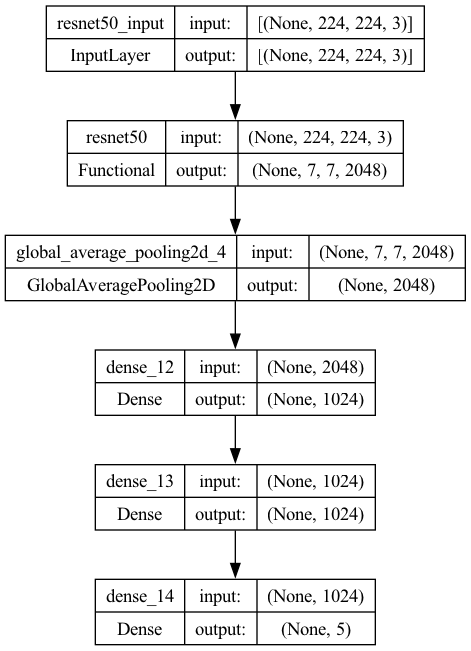

In [41]:
from tensorflow.keras.utils import plot_model

model = create_model()  # Sua função que cria o modelo
plot_model(model, to_file="modelo.png", show_shapes=True, show_layer_names=True)


In [42]:
import netron
netron.start("best_model_com_blurred_sharp_150.h5")


Serving 'best_model_com_blurred_sharp_150.h5' at http://localhost:8080


('localhost', 8080)